#**THELOOK ECOMMERCE MARKETING ANALYSIS**


TheLook is a fictious eCommerce clothing site developed by the
Looker team. The dataset contains information about customers,
products, orders, logistic, web events and digital marketing
campaigns. The content of this dataset are synthetic, and are
provided to industry practitioners for the purpose of product
discovery, testing and evaluation.

#**Introduction**

This project is carried out to evaluate the level of sales and to provide new information that can be useful for developing more sales levels in the future using digital marketing campaigns.

The source of this dataset is from the Google Bigquery Public Dataset : [TheLook eCommerce](https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce?)

Business Problem : "How to increase sales in the future by optimizing marketing campaign?"



---



#**Data Analysis**

1. Total number of users by gender

In [ ]:
SELECT gender, count(gender) AS count_gender
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY gender
ORDER BY count_gender DESC;

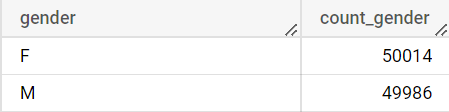

2. Total revenue per gender

In [ ]:
SELECT u.gender, SUM(sale_price) AS revenue
FROM
    `bigquery-public-data.thelook_ecommerce.order_items` oi 
INNER JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON oi.user_id = u.id
WHERE status = 'Complete'
GROUP BY gender
ORDER BY revenue DESC;

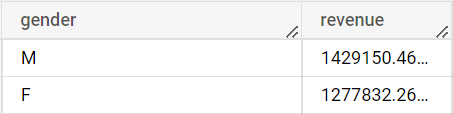

3. Total orders by age group

In [ ]:
SELECT
CASE
   WHEN age <21 then '<21'
   WHEN age between 21 and 30 then '21-30'
   WHEN age between 31 and 40 then '31-40'
   WHEN age between 41 and 50 then '41-50'
   WHEN age between 51 and 60 then '51-60'
   WHEN age >60 then '>60'
 END as age_range,
 COUNT(order_id) AS orders_completed
FROM
    `bigquery-public-data.thelook_ecommerce.orders` o 
INNER JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON o.user_id = u.id
WHERE status = 'Complete'
GROUP BY age_range
ORDER BY orders_completed DESC;

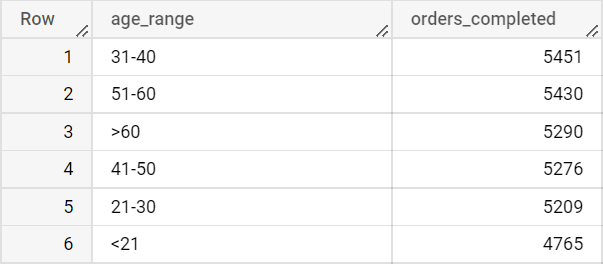

4. Total orders by marketing traffic source

In [ ]:
SELECT 
traffic_source, 
COUNT(order_id) AS total_orders
FROM
    `bigquery-public-data.thelook_ecommerce.orders` o 
INNER JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON o.user_id = u.id
GROUP BY traffic_source
ORDER BY total_orders DESC;

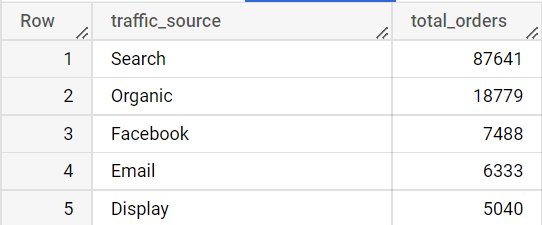

5. Total completed orders by country and "Search" traffic source

In [ ]:
SELECT 
country,
traffic_source, 
COUNT(order_id) AS count
FROM
    `bigquery-public-data.thelook_ecommerce.orders` o 
INNER JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON o.user_id = u.id
WHERE status = 'Complete' AND traffic_source = 'Search'
GROUP BY country, traffic_source
ORDER BY count ASC;

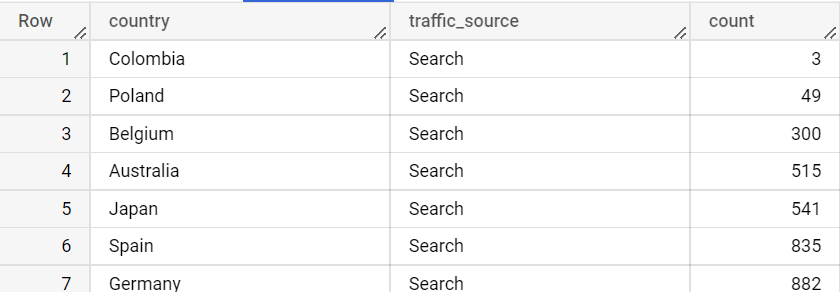

6. Total revenue by country

In [ ]:
SELECT
    u.country,
    ROUND(SUM(sale_price),2) AS revenue
FROM
    `bigquery-public-data.thelook_ecommerce.order_items` oi 
INNER JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON oi.user_id = u.id
WHERE status = 'Complete'
GROUP BY u.country
ORDER BY revenue ASC;

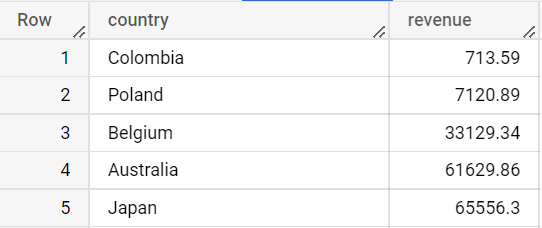



---



#**Summary**
*   Observed from the demography of  users of Thelook Ecommerce, it can be seen that the number of female users is higher than male. But, seeing from the revenue, male generated higher revenue compared to female users.

*   The age group of 31-40 have the highest total completed orders while the age group of <21 have the least total orders of all age group.

*   Based on the traffic source used by users to find out Thelook Ecommerce, there are 5 categories of traffic sources consisting of Search, Organic, Facebook, Email, and Display. Traffic source "Search" is the most widely used traffic source compared to other traffic sources.

*  Although "Search" Traffic source is the most widely used in overall, but in some countries like Colombia and Poland it only has completed smaller amount of orders compared to other countries.

*   In reviewing the level of revenue generated by country segmentation, it can be seen that there are three countries with the lowest revenue levels, such as Colombia, Poland, Belgium.




#**Recommendation**

*   Since the number of female users are higher compared to male but has lower revenue , it will be beneficial to target more female audience for our next marketing campaign

*   The level of orders by age group are almost the same value so there are only have little effect to sales

*   It can be seen that the most used traffic source is the Search category compared to other categories. In this case, it is necessary to increase the appearance from various other traffic sources which can ultimately affect the level of sales in the future

*   The Search traffic source which has very low level of orders completed on some countries like Colombia and Poland need evaluation to optimize its sales

*   In overcoming lower revenue in some countries like Colombia, Poland and Belgium, there is a need for further evaluation of customer culture, sales and marketing methods in these countries.
